In [146]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Load Dataset
data = pd.read_csv("final_data.csv", sep=',')
display(data)
# data.head(5)
print("# Present: ", data.shape[0])
print(data.info())

,Day,Start,Category,Company,Ordered,Event After,Duration
0,6,40,1,1,0,0,44
1,6,35,2,1,0,0,30
2,0,40,2,0,0,0,20
3,2,148,0,1,0,1,44
4,3,90,1,1,0,0,30
5,3,73,2,0,1,0,29
6,4,25,1,1,0,0,36
7,4,105,2,0,0,0,23
8,5,90,1,1,0,0,33
9,5,65,2,1,0,0,32


# Present:  33
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Day          33 non-null     int64
 1   Start        33 non-null     int64
 2   Category     33 non-null     int64
 3   Company      33 non-null     int64
 4   Ordered      33 non-null     int64
 5   Event After  33 non-null     int64
 6   Duration     33 non-null     int64
dtypes: int64(7)
memory usage: 1.9 KB
None


In [170]:
# Outlier Data
target = "Duration"

# Targets
Y = np.array(data[target])
avg = np.average(Y)
var = np.var(Y)
print("Average: ", avg)
print("Variance: ", var)

# Percentile
print("# Present: ", data.shape[0])
p = 10
tail, head = np.percentile(data[target], q=p), np.percentile(data[target], q=100-p)

# Outliers
out_data = data[((data[target] < tail) | (data[target] > head))]

# Remove Outliners
data = data[~((data[target] < tail) | (data[target] > head))]

# Number of Outliers
print("# Outliers: ", out_data.shape[0])
print("# Present: ", data.shape[0])
Y = np.array(data[target])
avg = np.average(Y)
var = np.var(Y)
print("Average: ", avg)
print("Variance: ", var)

Average:  29.696969696969695
Variance:  83.3627180899908
# Present:  33
# Outliers:  8
# Present:  25
Average:  29.28
Variance:  43.64160000000001


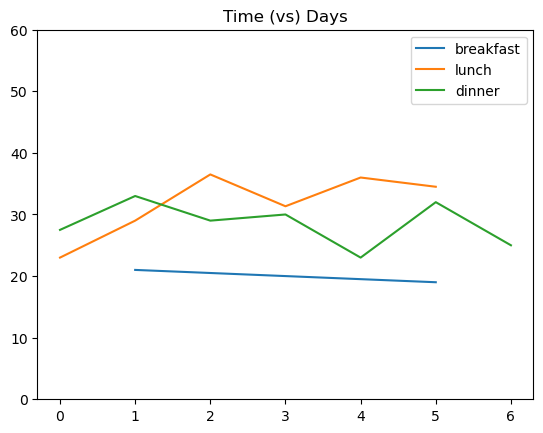

In [171]:
# Main Plot
breakfast_data = data[(data["Category"] == 0)]
lunch_data = data[(data["Category"] == 1)]
dinner_data = data[(data["Category"] == 2)]

# Prep something
def prep_arr(des):
    count = np.zeros(7)
    duration = np.zeros(7)
    x = []
    y = []

    for i in des:
        count[i[0]] += 1
        duration[i[0]] += i[1]

    for i in range(len(count)):
        if count[i] != 0:
            x.append(i)
            y.append(duration[i]/count[i])

    return x, y

ax, ay = prep_arr(breakfast_data[["Day", "Duration"]].to_numpy())
bx, by = prep_arr(lunch_data[["Day", "Duration"]].to_numpy())
cx, cy = prep_arr(dinner_data[["Day", "Duration"]].to_numpy())

# Matplotlib Stuff
plt.title('Time (vs) Days')

plt.plot(ax, ay, label='breakfast')
plt.plot(bx, by, label='lunch')
plt.plot(cx, cy, label='dinner')
plt.ylim([0, 60])
plt.legend()
plt.show()


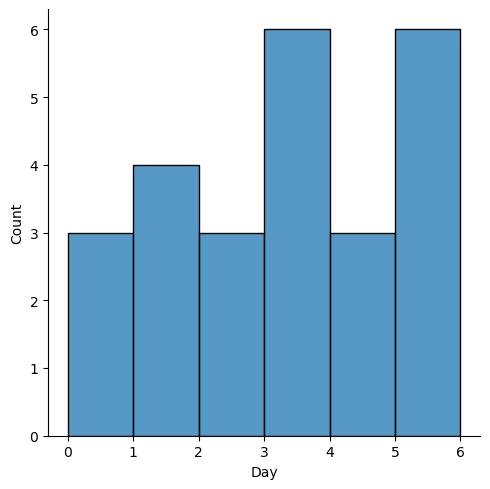

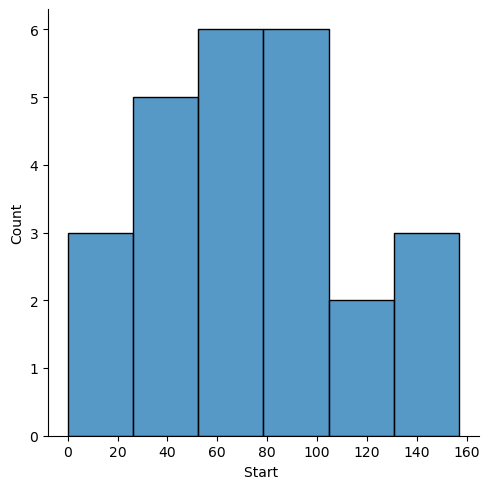

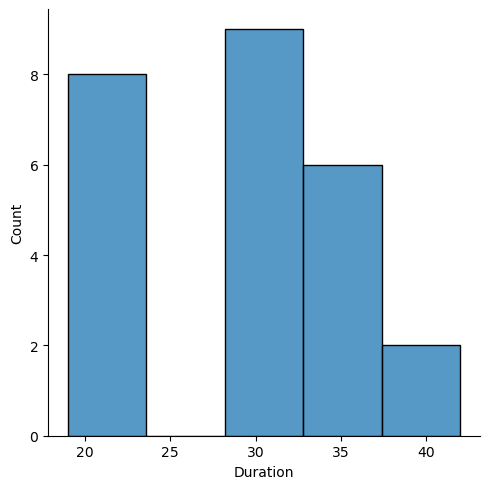

In [172]:
# Individual Densities (Overall)
sns.displot(data['Day'])
sns.displot(data['Start '])
# sns.displot(breakfast_data[['Start ']])
# #sns.displot(data['Category'])
# #sns.displot(data['Company'])
# #sns.displot(data['Ordered'])
# #sns.displot(data['Event After'])
sns.displot(data['Duration'], bins=5)


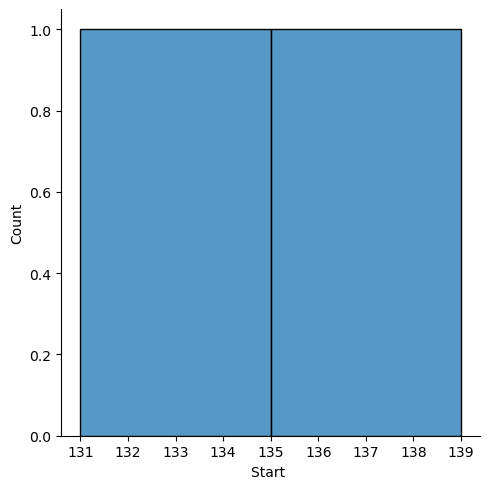

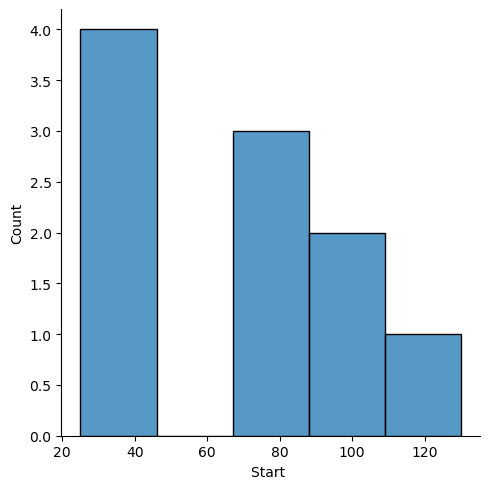

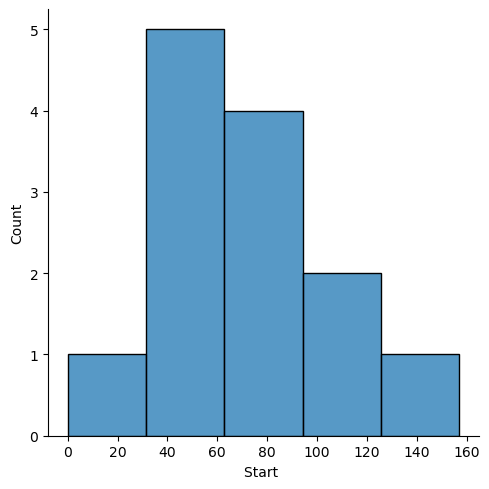

In [173]:
# Individual Densities of Start (By Category)
sns.displot(breakfast_data['Start '])
sns.displot(lunch_data['Start '])
sns.displot(dinner_data['Start '])

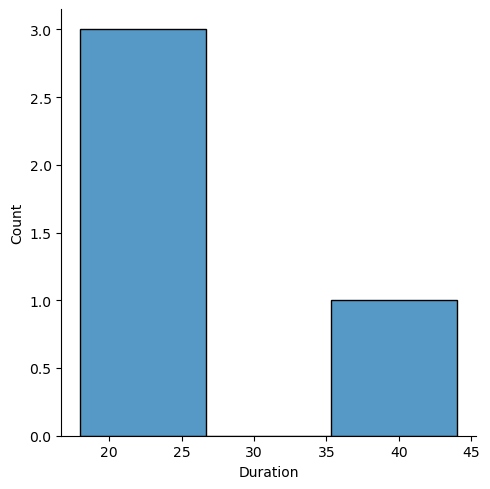

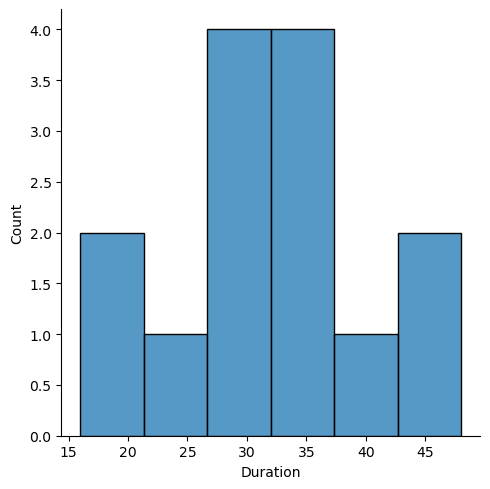

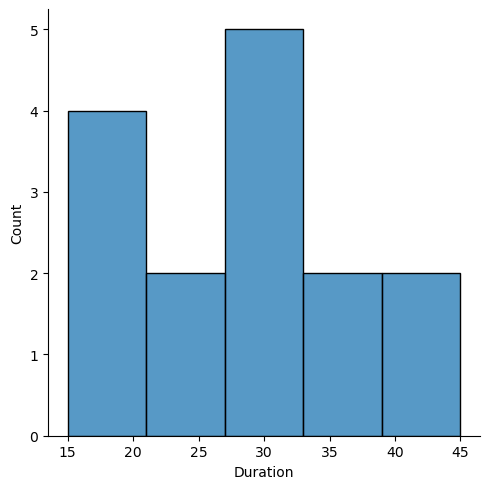

In [169]:
# Individual Densities of Duration (By Category)
sns.displot(breakfast_data['Duration'])
sns.displot(lunch_data['Duration'])
sns.displot(dinner_data['Duration'])

In [174]:
data[["Day", "Start ", "Duration"]].describe()

,Day,Start,Duration
count,25.000000,25.000000,25.000000
mean,2.880000,73.600000,29.280000
std,1.855622,39.765982,6.742403
min,0.000000,0.000000,19.000000
25%,1.000000,40.000000,23.000000
50%,3.000000,75.000000,29.000000
75%,4.000000,91.000000,35.000000
max,6.000000,157.000000,42.000000


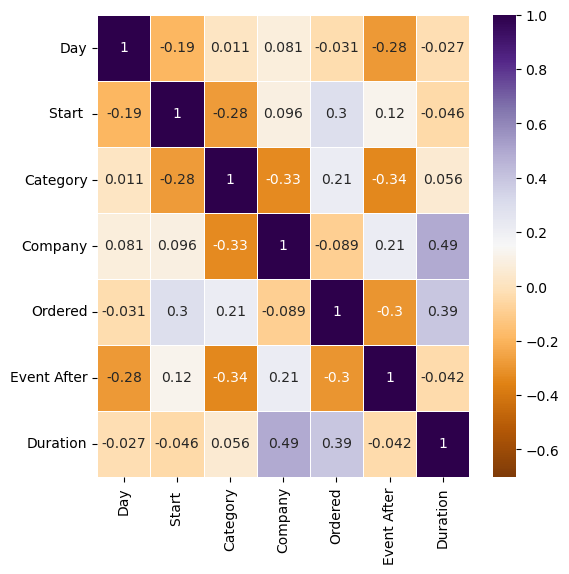

In [175]:
# Sample correlations using Seaborn heatmap
correlation = data.corr()
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="PuOr")